Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
like = Himmelblau(2)
transform = lambda x: 5*x
#like = Rosenbrock(4)
#transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
sampler = NestedSampler(like.x_dim, like.loglike, transform=transform, num_live_points=1000, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run17
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [7]:
sampler.run()

[nnest.sampler] [INFO] MCMC steps [10]
[nnest.sampler] [INFO] Initial scale [1.4142]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-6.3081e+02] max logl [-1.7698e-01] logz [-6.3772e+02] vol [1.00000e+00] ncalls [1001] mean calls [1.0000]
[nnest.sampler] [INFO] Step [200] loglstar [-2.0436e+02] max logl [-1.7698e-01] logz [-2.1054e+02] vol [8.18731e-01] ncalls [1223] mean calls [1.0000]
[nnest.sampler] [INFO] Step [400] loglstar [-1.5731e+02] max logl [-1.7698e-01] logz [-1.6261e+02] vol [6.70320e-01] ncalls [1488] mean calls [1.3000]
[nnest.sampler] [INFO] Step [600] loglstar [-1.2549e+02] max logl [-1.6201e-01] logz [-1.3102e+02] vol [5.48812e-01] ncalls [1843] mean calls [2.6000]
[nnest.sampler] [INFO] Step [800] loglstar [-1.0296e+02] max logl [-1.6201e-01] logz [-1.0805e+02] vol [4.49329e-01] ncalls [2240] mean calls [1.5000]
[nnest.sampler] [INFO] Step [1000] loglstar [-8.6824e+01] max logl [-1.6201e-01] logz [-9.2408e+01] vol [3.67879e-0

[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0003]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0258] validation loss [-0.0270]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.0325] validation loss [-0.0324]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0328] validation loss [-0.0328]
[nnest.trainer] [INFO] Epoch [150] train loss [-0.0331] validation loss [-0.0329]
[nnest.trainer] [INFO] Epoch [188] ran out of patience
[nnest.trainer] [INFO] Best epoch [138] validation loss [-0.0330]
[nnest.sampler] [INFO] Acceptance [0.4700] min ESS [2.4969] max ESS [4.3474] average jump distance [0.2378]
[nnest.sampler] [INFO] Step [5000] loglstar [-1.7406e+00] maxlogl [-6.6813e-04] logz [-7.2344e+00] vol [6.73795e-03] ncalls [30966] scale [0.9017]
[nnest.sampler] [INFO] Acceptance [0.5900] min ESS [2.2598] max ESS [2.3273] average jump distance [0.1268]
[nnest.sampler] [INFO] Step [5200] loglstar [-1.4246e+00] maxlogl [-6.6813e-04] logz [

In [8]:
print(sampler.logz)

-5.536885466047839


In [9]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=sampler.loglikes)

Removed no burn in


In [10]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

3167.925844480164
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      7.9305707E-01  3.1821247E+00 -3.8506110E+00  3.7038920E+00  two   -3.9557177E+00  3.7832821E+00  two   -3.9497298E+00  3.7797672E+00  two     p_{1}
param2      2.1394709E-01  2.4728622E+00 -3.3863589E+00  3.2541503E+00  two   -3.5072618E+00  3.3591597E+00  two   -3.4826142E+00  3.3388904E+00  two     p_{2}



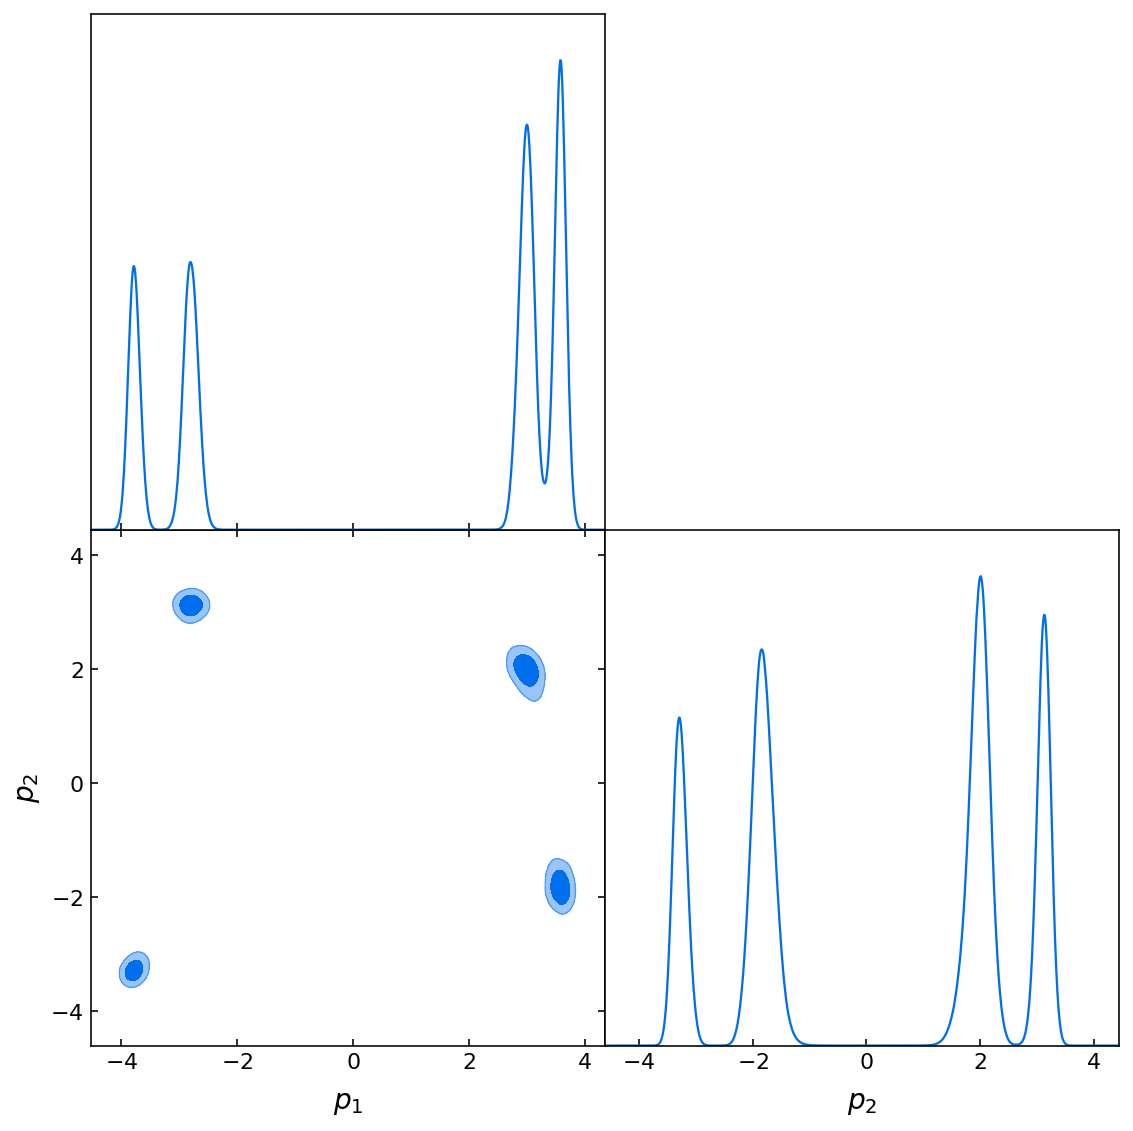

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)